In [1]:
# first set up which gpu to use
import os
gpu_ids = 0
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_ids}"

In [2]:
import torch
torch.cuda.is_available()

True

In [5]:
import torch
import pytorch3d

print("PyTorch version:", torch.__version__)
print("PyTorch3D version:", pytorch3d.__version__)

PyTorch version: 2.4.1
PyTorch3D version: 0.7.8


In [7]:
!pip install PyMCubes
!pip install einops
!pip install omegaconf
!pip install open3d
!pip install trimesh

In [4]:
import torch
import pytorch3d

print("PyTorch version:", torch.__version__)
print("PyTorch3D version:", pytorch3d.__version__)

PyTorch version: 2.4.1
PyTorch3D version: 0.7.8


In [3]:
import numpy as np
from termcolor import colored, cprint
from IPython.display import Image as ipy_image
from IPython.display import display
import torch
import torch.backends.cudnn as cudnn
cudnn.benchmark = True
import torchvision.utils as vutils

from datasets.dataloader import CreateDataLoader, get_data_generator
from models.base_model import create_model
from utils.util_3d import render_sdf, render_mesh, sdf_to_mesh, save_mesh_as_gif

# Load extension for autoreload
%load_ext autoreload
%autoreload 2

In [4]:
from utils.demo_util import SDFusionOpt

seed = 2023
opt = SDFusionOpt(gpu_ids=gpu_ids, seed=seed)
device = opt.device

# Initialize SDFusion model
ckpt_path = 'saved_ckpt/sdfusion-snet-all.pth'  # Ganti dengan path yang sesuai
dset = "snet"
opt.init_model_args(ckpt_path=ckpt_path)
opt.init_dset_args(dataset_mode=dset)
SDFusion = create_model(opt)
cprint(f'[*] "{SDFusion.name()}" loaded.', 'cyan')

[*] SDFusionTestOption initialized.
Working with z of shape (1, 3, 16, 16, 16) = 12288 dimensions.


/mnt/c/Users/TRIAN/SDFusion Duplicate/models/model_utils.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(vq_ckpt, map_location=map_fn)


[*] VQVAE: weight successfully load from: saved_ckpt/vqvae-snet-all.pth


/mnt/c/Users/TRIAN/SDFusion Duplicate/models/sdfusion_model.py:544: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(ckpt, map_location=map_fn)


[*] weight successfully load from: saved_ckpt/sdfusion-snet-all.pth
[*] setting ddim_steps=200
[*] Model has been created: SDFusion-Model
[*] "SDFusion-Model" loaded.


In [ ]:
## UnShape

In [ ]:
# unconditional generation
out_dir = 'demo_results'
if not os.path.exists(out_dir): os.makedirs(out_dir)

ngen = 6
ddim_steps = 100
ddim_eta = 0.

sdf_gen = SDFusion.uncond(ngen=ngen, ddim_steps=ddim_steps, ddim_eta=ddim_eta)

mesh_gen = sdf_to_mesh(sdf_gen)

# vis as gif
gen_name = f'{out_dir}/uncond.gif'
save_mesh_as_gif(SDFusion.renderer, mesh_gen, nrow=3, out_name=gen_name)

for name in [gen_name]:
    display(ipy_image(name))

## Shape

In [5]:
# Specify the path to your dataset in Google Drive
dataroot = 'data'  # Ganti dengan path yang sesuai
dset = 'snet'
opt.init_dset_args(dataroot=dataroot, dataset_mode=dset)
_, test_dl, _ = CreateDataLoader(opt)
test_ds = test_dl.dataset

[*] 3 samples for patung (02691156).
[*] 9 samples for bungang (02828884).
[*] 5 samples for jendela (02933112).
[*] 3 samples for kincut (02958343).
[*] 3 samples for pemucu (03001627).
[*] 10 samples for pintu (03211117).
[*] 5 samples for lambang (03636649).
[*] 5 samples for adeg (04256520).
[*] 9 samples for prada (04379243).
[*] 52 samples loaded.
[*] 3 samples for patung (02691156).
[*] 9 samples for bungang (02828884).
[*] 5 samples for jendela (02933112).
[*] 3 samples for kincut (02958343).
[*] 3 samples for pemucu (03001627).
[*] 10 samples for pintu (03211117).
[*] 5 samples for lambang (03636649).
[*] 5 samples for adeg (04256520).
[*] 9 samples for prada (04379243).
[*] 52 samples loaded.
[*] Dataset has been created: ShapeNetSDFDataset


In [ ]:
data_ix = 44
test_data = test_ds[data_ix]
shape = test_data['sdf'].unsqueeze(0).to(device)

In [596]:
data_ix = 10
test_data = test_ds[data_ix]
shape = test_data['sdf'].unsqueeze(0).to(device)

# Extract the path
path = test_data['path']

category_id = path.split('/')[-3]
category_data = path.split('/')[-2]

# Split the path and get the desired part
identifier = f"{category_id}/{category_data}"

print(path)
print(identifier)

data/ShapeNet/SDF_v1/resolution_64/03636649/9dad7ce60aa168d72cd2160e449d45ae/ori_sample_grid.h5
03636649/9dad7ce60aa168d72cd2160e449d45ae


In [573]:
x_min, x_max = -1, 1
y_min, y_max = 0, 1
z_min, z_max = -1, 1
xyz_dict = {'x': (x_min, x_max), 'y': (y_min, y_max), 'z': (z_min, z_max)}

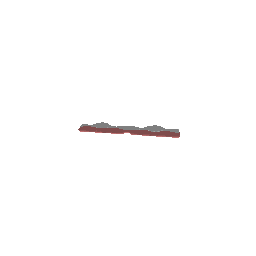

In [597]:
from utils.demo_util import get_partial_shape
from utils.util_3d import combine_meshes

ret = get_partial_shape(shape, xyz_dict)
shape_part, shape_missing = ret['shape_part'], ret['shape_missing']

mesh_part = sdf_to_mesh(shape_part)
mesh_missing = sdf_to_mesh(shape_missing, color=[1, .6, .6])

mesh_comb = combine_meshes(mesh_part, mesh_missing)

# Save visualization
out_dir = 'demo_results'
if not os.path.exists(out_dir): os.makedirs(out_dir)
sc_input_name = f'{out_dir}/shape_comp_input_ukiran_{data_ix}.gif'
save_mesh_as_gif(SDFusion.renderer, mesh_comb, nrow=3, out_name=sc_input_name)

for name in [sc_input_name]:
    display(ipy_image(name))

Data shape for DDIM sampling is (6, 3, 16, 16, 16), eta 0.0
Running DDIM Sampling with 100 timesteps


DDIM Sampler: 100%|███████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.02it/s]


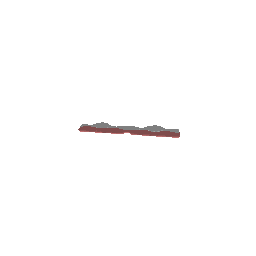

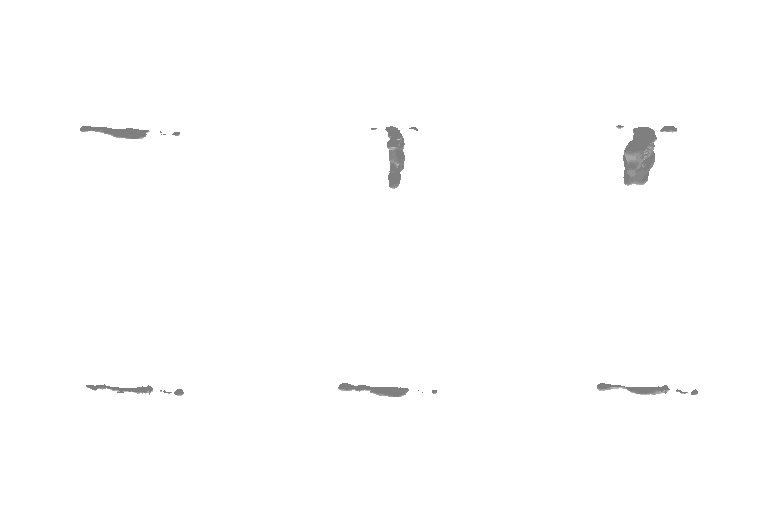

In [598]:
ngen = 6
ddim_steps = 100
ddim_eta = 0.
output_shape_comp = SDFusion.shape_comp(shape, xyz_dict, ngen=ngen, ddim_steps=ddim_steps, ddim_eta=ddim_eta)

mesh_shape_comp = sdf_to_mesh(output_shape_comp)

# Visualize output
sc_output_name = f'{out_dir}/shape_comp_output_ukiran_{data_ix}.gif'
save_mesh_as_gif(SDFusion.renderer, mesh_shape_comp, nrow=3, out_name=sc_output_name)

for name in [sc_input_name, sc_output_name]:
    display(ipy_image(name))


Mesh saved as .obj file at: demo_results/shape_comp_output_ukiran_10.obj


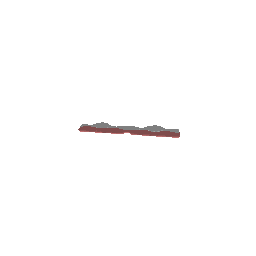

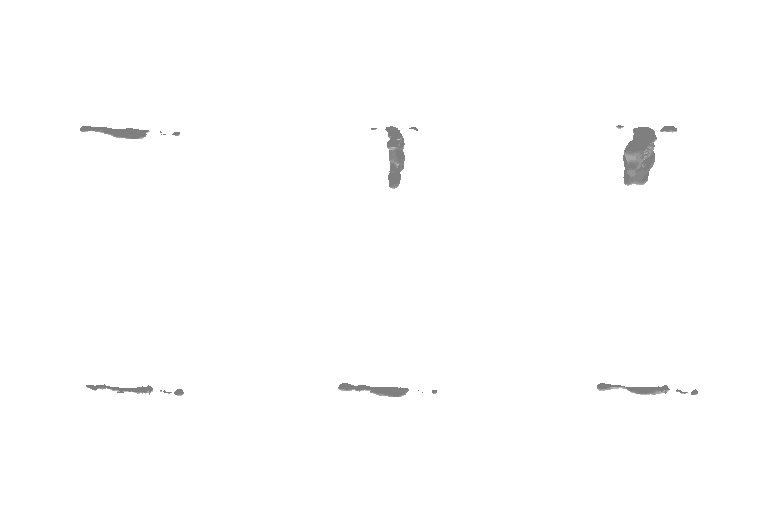

In [599]:
from pytorch3d.io import save_obj

# Save as .obj file
obj_output_path = f"{out_dir}/shape_comp_output_ukiran_{data_ix}.obj"
save_obj(obj_output_path, mesh_shape_comp.verts_packed(), mesh_shape_comp.faces_packed())
print(f"Mesh saved as .obj file at: {obj_output_path}")

# Visualize output
sc_output_name = f'{out_dir}/shape_comp_output_ukiran_{data_ix}.gif'
save_mesh_as_gif(SDFusion.renderer, mesh_shape_comp, nrow=3, out_name=sc_output_name)

for name in [sc_input_name, sc_output_name]:
    display(ipy_image(name))

### Scoring

In [15]:
import numpy as np
import trimesh
import torch
from pytorch3d.loss import chamfer_distance
from scipy.optimize import linear_sum_assignment

# Fungsi untuk meload point cloud dari file .obj
def load_point_cloud_obj(file_path):
    mesh = trimesh.load(file_path)
    points = mesh.vertices  # Ambil titik (vertices) dari objek
    return points

# Fungsi Chamfer Distance menggunakan pytorch3d
def calculate_chamfer_distance(pred, gt):
    pred_tensor = torch.tensor(pred, dtype=torch.float32).unsqueeze(0)
    gt_tensor = torch.tensor(gt, dtype=torch.float32).unsqueeze(0)
    cd_loss, _ = chamfer_distance(pred_tensor, gt_tensor)
    return cd_loss.item()

# Fungsi F-Score
def calculate_f_score(pred, gt, threshold=0.01):
    pred_to_gt = np.min(np.linalg.norm(pred[:, None] - gt[None, :], axis=2), axis=1)
    gt_to_pred = np.min(np.linalg.norm(gt[:, None] - pred[None, :], axis=2), axis=1)

    precision = np.mean(pred_to_gt < threshold)
    recall = np.mean(gt_to_pred < threshold)
    f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f_score

# Simpan mesh ke file OBJ
def save_mesh_to_obj(mesh, output_path):
    mesh.export(output_path)

# Misalkan `predicted_voxel` adalah hasil prediksi yang berisi voxel dari model Anda
# Pastikan data dalam numpy array dan dalam bentuk kubus (misalnya 32x32x32)
predicted_voxel = ...  # Ganti dengan hasil prediksi Anda
threshold = 0.5
voxel_grid = (predicted_voxel > threshold).astype(np.uint8)

# Konversi voxel ke mesh menggunakan Trimesh
vertices, faces, _, _ = trimesh.voxel.ops.voxel_to_mesh(voxel_grid)

# Buat objek mesh dari vertices dan faces
mesh = trimesh.Trimesh(vertices=vertices, faces=faces)

# Simpan mesh ke file OBJ
output_path = "output_shape_completion.obj"
save_mesh_to_obj(mesh, output_path)

# Load data ground truth dan prediksi dari file .obj
point_cloud_gt = load_point_cloud_obj("path/to/ground_truth.obj")  # Ganti dengan path yang sesuai
point_cloud_pred = load_point_cloud_obj(output_path)

# Hitung semua metrik evaluasi
cd = calculate_chamfer_distance(point_cloud_pred, point_cloud_gt)
f_score = calculate_f_score(point_cloud_pred, point_cloud_gt, threshold=0.01)

# Tampilkan hasil evaluasi
print("Evaluasi Model Shape Completion:")
print("Chamfer Distance:", cd)
print("F-Score:", f_score)

TypeError: '>' not supported between instances of 'ellipsis' and 'float'

In [ ]:
pip install trimesh scipy pytorch3d


Calculating f score

Calculating CD

In [14]:
import trimesh
import numpy as np
import torch
from pytorch3d.loss import chamfer_distance
from scipy.optimize import linear_sum_assignment

# Fungsi untuk meload point cloud dari file .obj
def load_point_cloud_obj(file_path):
    mesh = trimesh.load(file_path)
    points = mesh.vertices  # Ambil titik (vertices) dari objek
    return points

# Fungsi Chamfer Distance menggunakan pytorch3d
def calculate_chamfer_distance(pred, gt):
    pred_tensor = torch.tensor(pred, dtype=torch.float32).unsqueeze(0)
    gt_tensor = torch.tensor(gt, dtype=torch.float32).unsqueeze(0)
    cd_loss, _ = chamfer_distance(pred_tensor, gt_tensor)
    return cd_loss.item()

# Fungsi Earth Mover's Distance (EMD) menggunakan optimal transport
def calculate_emd(pred, gt):
    distance_matrix = np.linalg.norm(pred[:, None] - gt[None, :], axis=2)
    row_ind, col_ind = linear_sum_assignment(distance_matrix)
    emd = distance_matrix[row_ind, col_ind].sum() / len(row_ind)
    return emd

# Fungsi F-Score
def calculate_f_score(pred, gt, threshold=0.01):
    pred_to_gt = np.min(np.linalg.norm(pred[:, None] - gt[None, :], axis=2), axis=1)
    gt_to_pred = np.min(np.linalg.norm(gt[:, None] - pred[None, :], axis=2), axis=1)

    precision = np.mean(pred_to_gt < threshold)
    recall = np.mean(gt_to_pred < threshold)
    f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f_score

# Fungsi Intersection over Union (IoU)
def calculate_iou(pred, gt, threshold=0.01):
    pred_voxel = (np.linalg.norm(pred[:, None] - gt[None, :], axis=2) < threshold).sum(axis=1) > 0
    gt_voxel = (np.linalg.norm(gt[:, None] - pred[None, :], axis=2) < threshold).sum(axis=1) > 0

    intersection = np.logical_and(pred_voxel, gt_voxel).sum()
    union = np.logical_or(pred_voxel, gt_voxel).sum()
    return intersection / union if union > 0 else 0

# Load data ground truth dan prediksi dari file .obj
point_cloud_gt = load_point_cloud_obj("path/to/ground_truth.obj")
point_cloud_pred = load_point_cloud_obj("path/to/prediction.obj")

# Hitung semua metrik evaluasi
cd = calculate_chamfer_distance(point_cloud_pred, point_cloud_gt)
emd = calculate_emd(point_cloud_pred, point_cloud_gt)
f_score = calculate_f_score(point_cloud_pred, point_cloud_gt, threshold=0.01)
iou = calculate_iou(point_cloud_pred, point_cloud_gt, threshold=0.01)

# Tampilkan hasil evaluasi
print("Evaluasi Model Shape Completion:")
print("Chamfer Distance:", cd)
print("Earth Mover's Distance:", emd)
print("F-Score:", f_score)
print("IoU:", iou)


ValueError: string is not a file: path/to/ground_truth.obj

In [600]:
# Path to the OBJ file
file_path = "data/ShapeNet/ShapeNetCore.v1/" + identifier + "/model.obj"

# Count the number of vertices
num_gt_points = 0
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("v "):  # Vertex line starts with "v "
            num_gt_points +=1
print(f"Number of points in the 3D model: {num_gt_points}")

Number of points in the 3D model: 34931


In [601]:
# Path to the OBJ file
file_path = "demo_results/shape_comp_output_ukiran_" + str(data_ix) + ".obj"
# Count the number of vertices
num_rec_points = 0
with open(file_path, 'r') as file:
    for line in file:
        if line.startswith("v "):  # Vertex line starts with "v "
            num_rec_points +=1
print(f"Number of points in the 3D model: {num_rec_points}")

Number of points in the 3D model: 8496


In [602]:
import numpy as np
from scipy.spatial import cKDTree

def compute_fscore(gt_points, rec_points, threshold, trim_percent=0.1):
    # Ground truth KDTree
    gt_tree = cKDTree(gt_points)
    rec_tree = cKDTree(rec_points)

    # Precision: Fraction of reconstructed points within the threshold of GT points
    dists_rec_to_gt, _ = gt_tree.query(rec_points, k=1)
    precision = np.mean(dists_rec_to_gt <= threshold)

    # Recall: Fraction of GT points within the threshold of reconstructed points
    dists_gt_to_rec, _ = rec_tree.query(gt_points, k=1)
    recall = np.mean(dists_gt_to_rec <= threshold)

    # F-score
    if precision + recall > 0:
        fscore = 2 * (precision * recall) / (precision + recall)
    else:
        fscore = 0.0

    gt_to_rec_dists, _ = gt_tree.query(rec_points, k=1)
    rec_to_gt_dists, _ = rec_tree.query(gt_points, k=1)

    # Compute Chamfer distance
    chamfer_dist = np.mean(rec_to_gt_dists**2) + np.mean(gt_to_rec_dists**2)

    dists, _ = gt_tree.query(rec_points, k=1)
    uhd = np.max(dists)
    
    # Sort distances and trim the largest values
    dists_rec_to_gt_sorted = np.sort(dists_rec_to_gt)
    trim_count = int(len(dists_rec_to_gt_sorted) * trim_percent)

    # Exclude the top trim_count largest distances
    trimmed_dists = dists_rec_to_gt_sorted[:-trim_count] if trim_count > 0 else dists_rec_to_gt_sorted

    # Compute the trimmed mean
    tmd = np.mean(trimmed_dists)
    
    return precision, recall, fscore, chamfer_dist, tmd, uhd

# Example usage
gt_points = np.random.rand(num_gt_points, 3) # Replace with actual ground truth
rec_points = np.random.rand(num_rec_points, 3) # Replace with reconstructed points
threshold = 0.01

precision, recall, fscore, chamfer, uhd, tmd = compute_fscore(gt_points, rec_points, threshold)

print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F-Score: {fscore:.4f}, Chamfer Distance: {chamfer:.4f}")
print(f"Unidirectional Hausdorff Distance (UHD): {uhd:.4f}")
print(f"Trimmed Mean Distance (TMD): {tmd:.4f}")

Precision: 0.1382, Recall: 0.0357, F-Score: 0.0567, Chamfer Distance: 0.0012
Unidirectional Hausdorff Distance (UHD): 0.0157
Trimmed Mean Distance (TMD): 0.0428


In [603]:
import pandas as pd
import os
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# Path to the Excel file
output_path = "demo_results/results.xlsx"

# Ensure the folder exists
os.makedirs("demo_results", exist_ok=True)

# Example of new data to add
new_data = {
        "Id": data_ix + 1,
        "Identifier": identifier,
        "Input": f'{out_dir}/shape_comp_input_ukiran_{data_ix}.gif',
        "Precision": precision,
        "Recall": recall,
        "F-Score": fscore,
        "Chamfer Distance": chamfer,
        "UHD": uhd,
        "TMD": tmd,
        "Output": f'{out_dir}/shape_comp_output_ukiran_{data_ix}.gif',
}

if os.path.exists(output_path):
    # Load workbook with openpyxl
    wb = load_workbook(output_path)
    ws = wb.active

    # Find the last row for appending
    last_row = data_ix + 2
else:
    # Create a new workbook and worksheet
        from openpyxl import Workbook
        wb = Workbook()
        ws = wb.active

    # Add headers
        headers = [
            "Id",
            "Identifier",
            "Input",
            "Precision",
            "Recall",
            "F-Score",
            "Chamfer Distance",
            "UHD",
            "TMD",
            "Output"
        ]
        ws.append(headers)

    # Start adding data at row 2
        last_row = 2

# Append new data
row_data = [
        new_data["Id"],
        new_data["Identifier"],
        new_data["Input"],  # Placeholder for image
        new_data["Precision"],
        new_data["Recall"],
        new_data["F-Score"],
        new_data["Chamfer Distance"],
        new_data["UHD"],
        new_data["TMD"],
        new_data["Output"]  # Placeholder for image
]
ws.append(row_data)

# Set column widths for images
ws.column_dimensions['C'].width = 20
ws.column_dimensions['J'].width = 20

# Set row height for images
ws.row_dimensions[last_row].height = 80

# Add Input Image
input_img_path = new_data["Input"]
if os.path.exists(input_img_path):
        img = Image(input_img_path)
        img.width, img.height = 80, 80  # Resize to fit cell
        ws.add_image(img, f"C{last_row}")  # Add to Input Image column

# Add Output Image
output_img_path = new_data["Output"]
if os.path.exists(output_img_path):
        img = Image(output_img_path)
        img.width, img.height = 80, 80  # Resize to fit cell
        ws.add_image(img, f"J{last_row}")  # Add to Output Image column

# Save the updated workbook
wb.save(output_path)

print(f"Excel file updated with new data and images: {output_path}")

Excel file updated with new data and images: demo_results/results.xlsx
